## IPL Data Analysis

In [ ]:
import pandas as pd 
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt 
%matplotlib inline

pd.set_option('display.max_columns', None)
warnings.simplefilter("ignore")
sns.set_style('darkgrid')

In [ ]:
''' reading dataset i.e matches.csv '''
df_matches = pd.read_csv('/content/matches.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
''' displaying 1st 5 rows '''
df_matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


In [ ]:
''' shape of dataset '''
df_matches.shape

(577, 18)

In [ ]:
''' checking null values '''
df_matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

In [ ]:
''' checking unique values in column Season '''
df_matches.season.unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016])

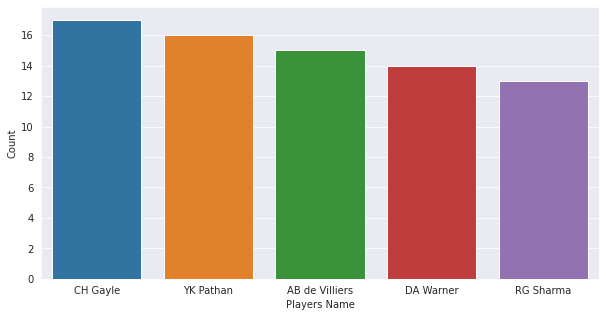

In [ ]:
''' barplot of top 5 most player_of_match ''' 
pom = df_matches.player_of_match.value_counts().nlargest(5)
plt.figure(figsize=(10, 5))
sns.barplot(pom.index, pom)
plt.xlabel('Players Name')
plt.ylabel('Count');

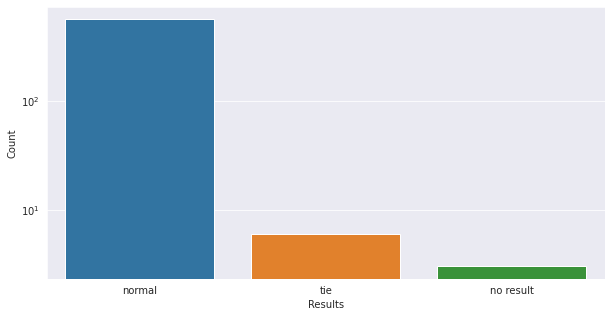

In [ ]:
''' value counts of results '''
result_label = df_matches.result.value_counts()

''' barplot '''
plt.figure(figsize=(10, 5))
sns.barplot(result_label.index, result_label, log=True)
plt.xlabel('Results')
plt.ylabel('Count');

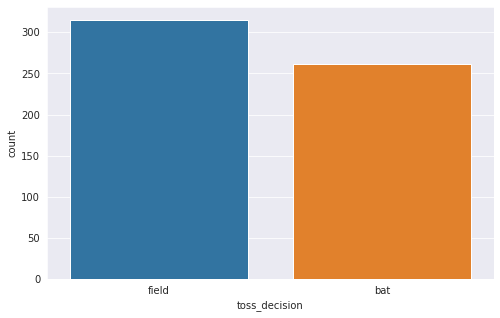

In [ ]:
''' count plot of toss_decision'''
plt.figure(figsize=(8, 5))
sns.countplot(df_matches.toss_decision);

In [ ]:
''' groupby by winner '''
df_matches.groupby('winner')['toss_decision'].value_counts()

winner                       toss_decision
Chennai Super Kings          bat              50
                             field            29
Deccan Chargers              field            15
                             bat              14
Delhi Daredevils             field            30
                             bat              26
Gujarat Lions                field             7
                             bat               2
Kings XI Punjab              field            44
                             bat              19
Kochi Tuskers Kerala         field             6
Kolkata Knight Riders        field            35
                             bat              33
Mumbai Indians               field            42
                             bat              38
Pune Warriors                bat               9
                             field             3
Rajasthan Royals             field            33
                             bat              30
Rising Pune Supergiants   

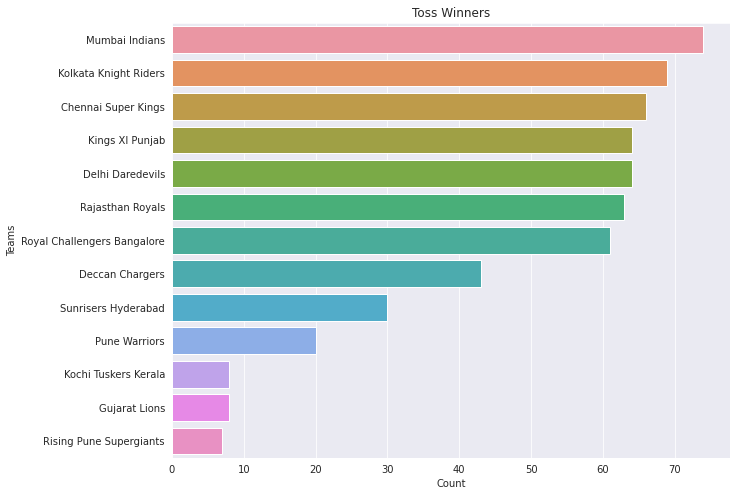

In [ ]:
''' barplot of most toss winners '''
toss_win_label = df_matches.toss_winner.value_counts()
plt.figure(figsize=(10, 8))
sns.barplot(toss_win_label, toss_win_label.index);
plt.ylabel('Teams')
plt.xlabel('Count')
plt.title('Toss Winners');

In [ ]:
'''teams did fielding first and result was normal '''
df_matches[(df_matches['toss_decision'] == 'field') & (df_matches['result'] == 'normal')].head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar,NaN
8,9,2008,Hyderabad,2008-04-24,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",Asad Rauf,MR Benson,NaN
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba,NaN
10,11,2008,Bangalore,2008-04-26,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,7,SR Watson,M Chinnaswamy Stadium,MR Benson,IL Howell,NaN


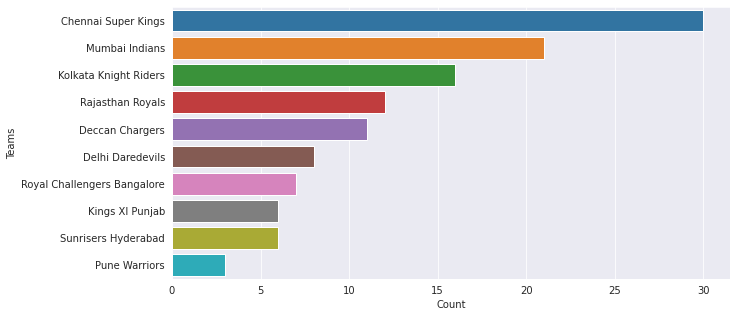

In [ ]:
''' teams did batting first and won'''
win = df_matches[(df_matches.toss_decision == 'bat') & (df_matches.win_by_runs != 0)]['winner'].value_counts().sort_values(ascending=False)

'''barplot'''
plt.figure(figsize=(10, 5))
sns.barplot(win, win.index)
plt.xlabel('Count')
plt.ylabel('Teams');

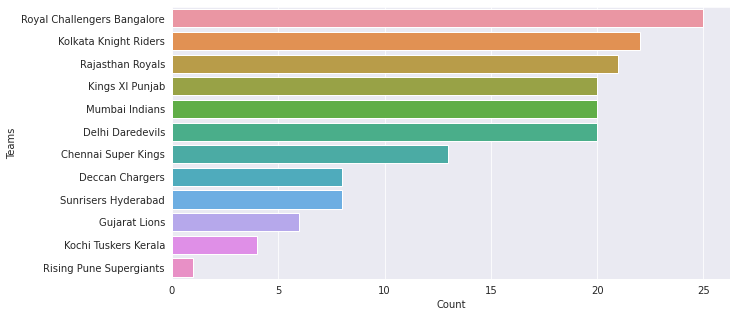

In [ ]:
''' teams did bowling first and won'''
win = df_matches[(df_matches.toss_decision == 'field') & (df_matches.win_by_wickets != 0)]['winner'].value_counts().sort_values(ascending=False)

'''barplot'''
plt.figure(figsize=(10, 5))
sns.barplot(win, win.index)
plt.xlabel('Count')
plt.ylabel('Teams');

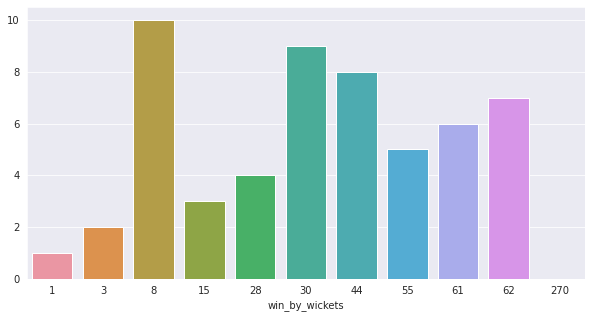

In [ ]:
''' barplot of won_by_wickets '''
plt.figure(figsize=(10, 5))
sns.barplot(df_matches.win_by_wickets.value_counts(), df_matches.win_by_wickets.value_counts().index)

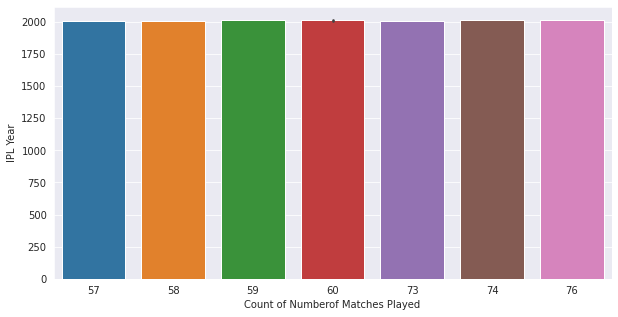

In [ ]:
''' number of matches played each year '''
season = df_matches['season'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(season, season.index)
plt.ylabel('IPL Year')
plt.xlabel('Count of Numberof Matches Played');

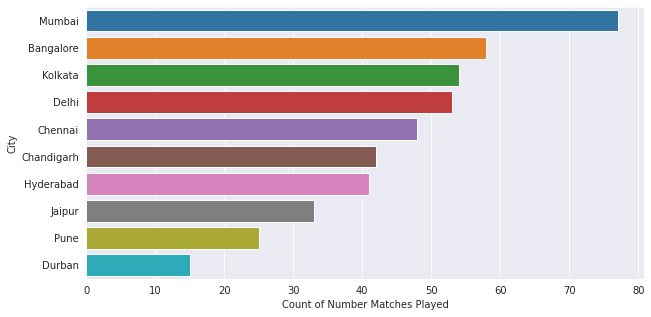

In [ ]:
''' number of matches played in top 10 city '''
city = df_matches['city'].value_counts().sort_values().nlargest(10)
plt.figure(figsize=(10, 5))
sns.barplot(city, city.index)
plt.ylabel('City')
plt.xlabel('Count of Number Matches Played');

In [ ]:
''' analysis on deliveries data file'''
df_deliveries = pd.read_csv('/content/deliveries.csv')

FileNotFoundError: ignored

In [ ]:
''' top 5 rows '''
df_deliveries.head()

In [ ]:
''' shape of data '''
df_deliveries.shape

In [ ]:
''' match id 1'''
df_match1 = df_deliveries[df_deliveries.match_id == 1]

''' top 5 rows '''
df_match1.head()

In [ ]:
''' shape of match id 1'''
df_match1.shape

In [ ]:
df_match1.batting_team.unique()

In [ ]:
''' 1st inning '''
srh = df_match1[df_match1['inning'] == 1]

In [ ]:
srh.head()

In [ ]:
srh['dismissal_kind'].value_counts()

In [ ]:
''' total number of balls bowled by srh '''
len(srh.ball)

NameError: ignored

In [ ]:
''' count of 4s hit by srh '''
len(srh[srh.total_runs == 4])

In [ ]:
''' count of 6s hit by srh '''
len(srh[srh.total_runs == 6])

In [ ]:
'''  2nd innings '''
rcb = df_match1[df_match1.inning == 2]

In [ ]:
rcb.head()

In [ ]:
rcb['dismissal_kind'].value_counts()

In [ ]:
''' total number of balls bowled by rcb '''
len(rcb.ball)

In [ ]:
''' count of 4s hit by rcb '''
len(rcb[rcb.total_runs == 4])

In [ ]:
''' count of 6s hit by rcb '''
len(rcb[rcb.total_runs == 6])